In [5]:
import pandas as pd
import random 
import matplotlib.pyplot as plt
import numpy as np


In [7]:
df = pd.read_csv("TelegramCount/newStat1.csv", delimiter = ",")

person_one = 'Daniil'
person_two = 'Jorge'
df['date'] = pd.to_datetime(df['date'])

df.columns = df.columns.str.strip()  # Remove leading and trailing spaces
total_rows = len(df)

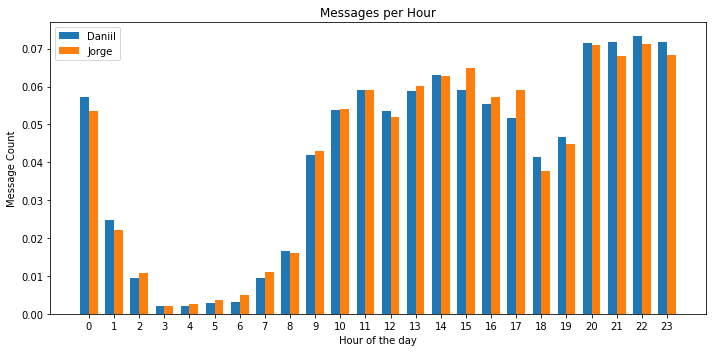

In [8]:
df_person_1 = df[(df['from'] == person_one)]
df_person_2 = df[(df['from'] == person_two)]

person_one_count_hours = df_person_1['hour'].value_counts().reindex(range(24), fill_value=0).tolist()
person_two_count_hours = df_person_2['hour'].value_counts().reindex(range(24), fill_value=0).tolist()

person_one_array = np.array(person_one_count_hours)
person_two_array = np.array(person_two_count_hours)

person_one_hour_norm = person_one_array / person_one_array.sum()
person_two_hour_norm = person_two_array / person_two_array.sum()

x = range(24)

# Plot histogram
plt.figure(figsize=(10, 5))
bar_width = 0.35

plt.bar([i - bar_width/2 for i in x], person_one_hour_norm, width=bar_width, label=person_one)
plt.bar([i + bar_width/2 for i in x], person_two_hour_norm, width=bar_width, label=person_two)

plt.xlabel('Hour of the day')
plt.ylabel('Message Count')
plt.title('Messages per Hour')
plt.xticks(ticks=x, labels=x)
plt.legend()
plt.tight_layout()
plt.show()


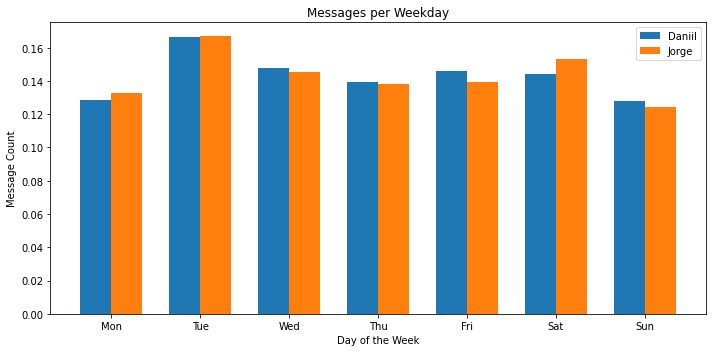

Highest activity day of Daniil is Tue : 0.16652196219266743
Lowest activity day of Daniil is Sun : 0.12776747306523542
Highest activity day of Jorge is Tue : 0.1668802506051545
Lowest activity day of Jorge is Sun : 0.12424889648298448


In [9]:

person_one_count_week_days = df_person_1['weekDay'].value_counts().reindex(range(7), fill_value=0).tolist()
person_two_count_week_days = df_person_2['weekDay'].value_counts().reindex(range(7), fill_value=0).tolist()


person_one_array = np.array(person_one_count_week_days)
person_two_array = np.array(person_two_count_week_days)

week_high_1 = np.argmax(person_one_array)
week_high_2 = np.argmax(person_two_array)

week_low_1 = np.argmin(person_one_array)
week_low_2 = np.argmin(person_two_array)

person_one_count_norm = person_one_array / person_one_array.sum()
person_two_count_norm = person_two_array / person_two_array.sum()

weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
x = range(7)

# Plot histogram
plt.figure(figsize=(10, 5))
bar_width = 0.35

plt.bar([i - bar_width/2 for i in x], person_one_count_norm, width=bar_width, label=person_one)
plt.bar([i + bar_width/2 for i in x], person_two_count_norm, width=bar_width, label=person_two)

plt.xlabel('Day of the Week')
plt.ylabel('Message Count')
plt.title('Messages per Weekday')
plt.xticks(ticks=x, labels=weekdays)
plt.legend()
plt.tight_layout()
plt.show()

print(f"Highest activity day of {person_one} is {weekdays[week_high_1]} : {person_one_count_norm[week_high_1]}")
print(f"Lowest activity day of {person_one} is {weekdays[week_low_1]} : {person_one_count_norm[week_low_1]}")
print(f"Highest activity day of {person_two} is {weekdays[week_high_2]} : {person_two_count_norm[week_high_1]}")
print(f"Lowest activity day of {person_two} is {weekdays[week_low_2]} : {person_two_count_norm[week_low_2]}")

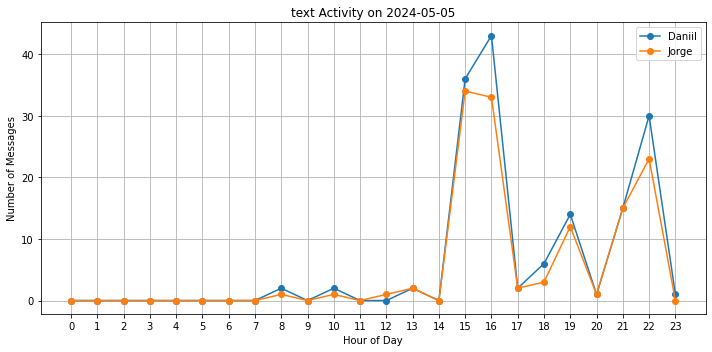

In [10]:
#Messaging activity on a specific date of specific message type

#YEAR-MONTH-DAY
date = '2024-05-05'

# Convert to datetime
date = pd.to_datetime(date)

type = 'text'
df_day = df[(df['date'] == date)]
df_day_type = df_day[(df_day['type'] == type)]

person_one_count = df_day_type[df_day_type['from'] == person_one]['hour'].value_counts().reindex(range(24), fill_value=0).tolist()
person_two_count = df_day_type[df_day_type['from'] == person_two]['hour'].value_counts().reindex(range(24), fill_value=0).tolist()

hours = list(range(24))

plt.figure(figsize=(10, 5))
plt.plot(hours, person_one_count, label=person_one, marker='o')
plt.plot(hours, person_two_count, label=person_two, marker='o')

plt.title(f'{type} Activity on {date.date()}')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Messages')
plt.xticks(hours)  # Show all 24 hours
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

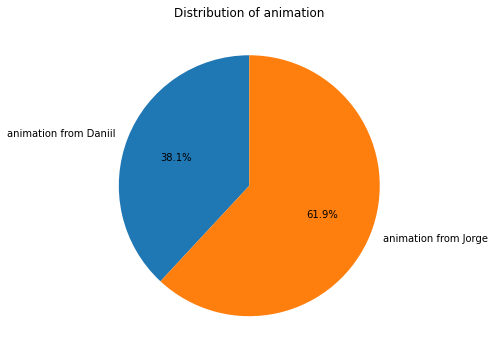

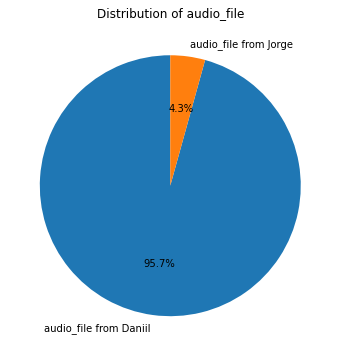

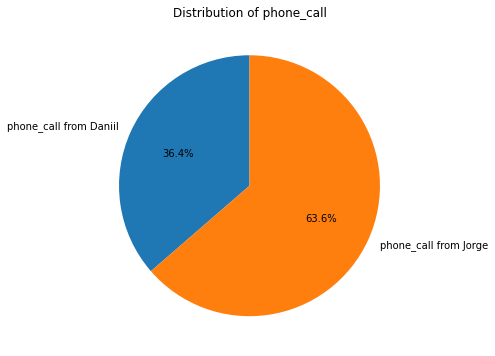

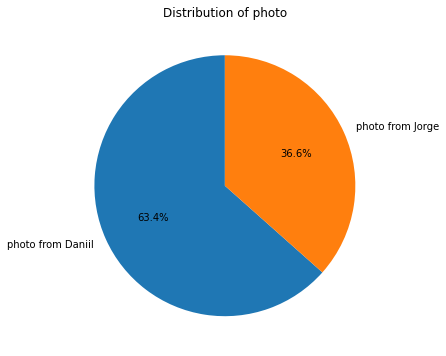

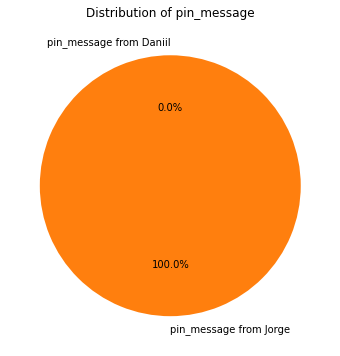

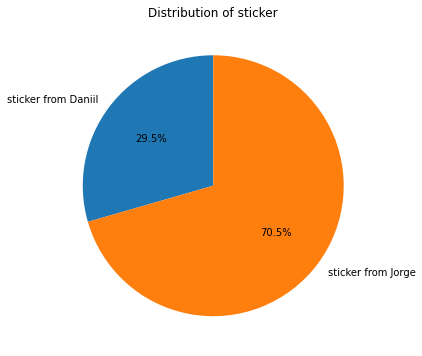

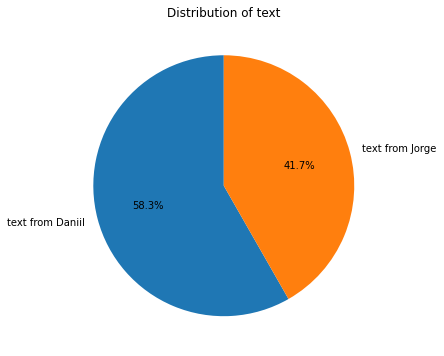

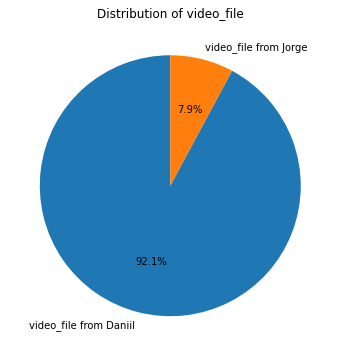

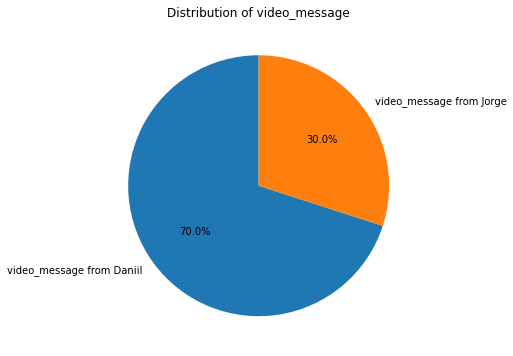

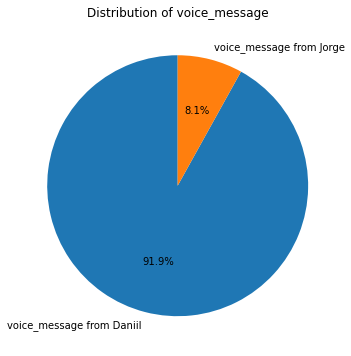

In [11]:
#Shows messages distribution between 2 person

# Get the full list of unique message types (e.g., ['photo', 'text', 'video'])
message_types = df['type'].sort_values().unique().tolist()

person_1_stat = df[df['from'] == person_one]['type'].value_counts().reindex(message_types, fill_value=0).tolist()
person_2_stat = df[df['from'] == person_two]['type'].value_counts().reindex(message_types, fill_value=0).tolist()

for stat in range (0, len(message_types)):

  labels = [f'{message_types[stat]} from {person_one}', f'{message_types[stat]} from {person_two}']
  sizes = [person_1_stat[stat], person_2_stat[stat]]
  plt.figure(figsize=(6, 6))
  plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
  plt.title(f'Distribution of {message_types[stat]}')
  plt.show()
